In [16]:
# Import required libraries
import pandas as pd
import numpy as np


In [7]:
# Load customer churn dataset
churn_df = pd.read_csv(r"C:\Users\digvi\Desktop\Sharpener\Portfolio\Business Case Study\Telecom+Customer+Churn\telecom_customer_churn.csv")
zipcode_df = pd.read_csv(r"C:\Users\digvi\Desktop\Sharpener\Portfolio\Business Case Study\Telecom+Customer+Churn\telecom_zipcode_population.csv")


In [8]:
# Preview churn dataset
churn_df.head()


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [9]:
zipcode_df.head()


,Zip Code,Population
0,90001,54492
1,90002,44586
2,90003,58198
3,90004,67852
4,90005,43019


In [10]:
# Check shape of churn dataset
churn_df.shape


(7043, 38)

In [11]:
zipcode_df.shape


(1671, 2)

In [13]:
# Inspect churn dataset structure
churn_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [9]:
zipcode_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Zip Code    1671 non-null   int64
 1   Population  1671 non-null   int64
dtypes: int64(2)
memory usage: 26.2 KB


In [10]:
# Summary statistics for churn dataset
churn_df.describe()


,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [11]:
# Count missing values per column
churn_df.isnull().sum().sort_values(ascending=False)


Churn Reason                         5174
Churn Category                       5174
Offer                                3877
Internet Type                        1526
Unlimited Data                       1526
Streaming Music                      1526
Streaming Movies                     1526
Streaming TV                         1526
Premium Tech Support                 1526
Device Protection Plan               1526
Online Security                      1526
Avg Monthly GB Download              1526
Online Backup                        1526
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Contract                                0
Age                                     0
Customer Status                         0
Total Revenue                           0
Total Long Distance Charges             0
Total Extra Data Charges                0
Total Refunds                           0
Total Charges                           0
Monthly Charge                    

In [12]:
# Create working copy of churn data
df = churn_df.copy()


In [13]:
# Distribution of customer status
df["Customer Status"].value_counts()


Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

In [14]:
# Convert Total Charges to numeric
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")


In [15]:
# Check updated data types
df.dtypes


Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

In [16]:
# Recheck missing values
df.isnull().sum().sort_values(ascending=False)


Churn Reason                         5174
Churn Category                       5174
Offer                                3877
Internet Type                        1526
Unlimited Data                       1526
Streaming Music                      1526
Streaming Movies                     1526
Streaming TV                         1526
Premium Tech Support                 1526
Device Protection Plan               1526
Online Security                      1526
Avg Monthly GB Download              1526
Online Backup                        1526
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Contract                                0
Age                                     0
Customer Status                         0
Total Revenue                           0
Total Long Distance Charges             0
Total Extra Data Charges                0
Total Refunds                           0
Total Charges                           0
Monthly Charge                    

In [22]:
# Fill churn-related missing values
df["Churn Reason"].fillna("Not Churned", inplace=True)
df["Churn Category"].fillna("Not Churned", inplace=True)


In [27]:
# Fill missing offer values
df["Offer"].fillna("No Offer", inplace=True)


In [29]:
# List of internet-related columns
internet_services = [
    "Internet Type", "Unlimited Data", "Streaming Music",
    "Streaming Movies", "Streaming TV", "Premium Tech Support",
    "Device Protection Plan", "Online Security", "Online Backup"
]

for col in internet_services:
    df[col].fillna("No Internet", inplace=True)

df["Avg Monthly GB Download"] = df["Avg Monthly GB Download"].fillna(0)



In [31]:
df["Avg Monthly Long Distance Charges"] = (
    df["Avg Monthly Long Distance Charges"].fillna(0)
)


In [32]:
# Refill categorical fields for safety
df["Churn Reason"] = df["Churn Reason"].fillna("Not Churned")
df["Churn Category"] = df["Churn Category"].fillna("Not Churned")
df["Offer"] = df["Offer"].fillna("No Offer")
df["Multiple Lines"] = df["Multiple Lines"].fillna("No Phone Service")


In [33]:
# Ensure all internet-related columns are filled
internet_services = [
    "Internet Type", "Unlimited Data", "Streaming Music",
    "Streaming Movies", "Streaming TV", "Premium Tech Support",
    "Device Protection Plan", "Online Security", "Online Backup"
]

for col in internet_services:
    df[col] = df[col].fillna("No Internet")


In [34]:
# Confirm no missing values remain
df.isnull().sum().sum()


np.int64(0)

In [72]:
# Calculate churn rate percentage
churn_rate = (df["Customer Status"] == "Churned").mean() * 100
churn_rate


np.float64(26.536987079369588)

In [35]:
# Count customers by status
df["Customer Status"].value_counts()


Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

In [36]:
# Percentage distribution of customer status
df["Customer Status"].value_counts(normalize=True) * 100


Customer Status
Stayed     67.016896
Churned    26.536987
Joined      6.446117
Name: proportion, dtype: float64

In [37]:
# Count customers who joined
total_joined = df[df["Customer Status"] == "Joined"].shape[0]
total_joined


454

In [38]:
# Customers who joined within last 3 months
last_quarter_joins = df[
    (df["Customer Status"] == "Joined") &
    (df["Tenure in Months"] <= 3)
]


In [39]:
# Count recent joins
last_quarter_joins.shape[0]


454

In [40]:
df.groupby("Customer Status")["Tenure in Months"].describe()


,count,mean,std,min,25%,50%,75%,max
Customer Status,,,,,,,,
Churned,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0
Joined,454.0,1.720264,0.818486,1.0,1.0,1.0,2.0,3.0
Stayed,4720.0,41.041525,22.363674,4.0,21.0,42.0,63.0,72.0


In [41]:
churned_df = df[df["Customer Status"] == "Churned"]
joined_df  = df[df["Customer Status"] == "Joined"]
stayed_df  = df[df["Customer Status"] == "Stayed"]


In [42]:
df.groupby("Customer Status")["Gender"].value_counts(normalize=True) * 100


Customer Status  Gender
Churned          Female    50.240770
                 Male      49.759230
Joined           Male      53.524229
                 Female    46.475771
Stayed           Male      50.466102
                 Female    49.533898
Name: proportion, dtype: float64

In [43]:
df.groupby("Customer Status")["Senior Citizen"].mean() * 100


KeyError: 'Column not found: Senior Citizen'

In [44]:
df.columns


Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [45]:
df["Age"].describe()


count    7043.000000
mean       46.509726
std        16.750352
min        19.000000
25%        32.000000
50%        46.000000
75%        60.000000
max        80.000000
Name: Age, dtype: float64

In [46]:
df.groupby("Customer Status")["Age"].mean()


Customer Status
Churned    49.735688
Joined     42.870044
Stayed     45.582415
Name: Age, dtype: float64

In [47]:
df["Senior"] = np.where(df["Age"] >= 65, 1, 0)


In [48]:
df.groupby("Customer Status")["Senior"].mean() * 100


Customer Status
Churned    25.468165
Joined      6.607930
Stayed     13.474576
Name: Senior, dtype: float64

In [49]:
df["Age Group"] = pd.cut(
    df["Age"],
    bins=[18, 30, 45, 60, 75, 100],
    labels=["18–30", "31–45", "46–60", "61–75", "76+"]
)

df.groupby("Customer Status")["Age Group"].value_counts(normalize=True) * 100


Customer Status  Age Group
Churned          46–60        24.826110
                 61–75        24.719101
                 31–45        24.451578
                 18–30        18.298555
                 76+           7.704655
Joined           31–45        35.462555
                 46–60        27.533040
                 18–30        23.127753
                 61–75        12.334802
                 76+           1.541850
Stayed           31–45        28.072034
                 46–60        27.966102
                 18–30        22.923729
                 61–75        16.906780
                 76+           4.131356
Name: proportion, dtype: float64

In [74]:
zipcode_df.head()


,Zip Code,Population
0,90001,54492
1,90002,44586
2,90003,58198
3,90004,67852
4,90005,43019


In [75]:
zipcode_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Zip Code    1671 non-null   int64
 1   Population  1671 non-null   int64
dtypes: int64(2)
memory usage: 26.2 KB


In [76]:
df["Zip Code"].dtype, zipcode_df["Zip Code"].dtype


(dtype('int64'), dtype('int64'))

In [77]:
df["Zip Code"] = df["Zip Code"].astype(str)
zipcode_df["Zip Code"] = zipcode_df["Zip Code"].astype(str)


In [78]:
df = df.merge(
    zipcode_df,
    on="Zip Code",
    how="left"
)


In [79]:
df["Population"].isnull().mean() * 100


np.float64(0.0)

In [81]:
df["Population Segment"] = pd.qcut(
    df["Population"],
    q=3,
    labels=["Low Population", "Medium Population", "High Population"]
)


In [82]:
pd.crosstab(
    df["Population Segment"],
    df["Customer Status"],
    normalize="index"
) * 100


Customer Status,Churned,Joined,Stayed
Population Segment,,,
Low Population,24.670353,6.039983,69.289664
Medium Population,24.328931,6.646783,69.024286
High Population,30.618337,6.652452,62.729211


In [50]:
df.groupby("Contract")["Customer Status"].value_counts(normalize=True) * 100


Contract        Customer Status
Month-to-Month  Churned            45.844875
                Stayed             42.853186
                Joined             11.301939
One Year        Stayed             87.741935
                Churned            10.709677
                Joined              1.548387
Two Year        Stayed             96.282528
                Churned             2.549124
                Joined              1.168348
Name: proportion, dtype: float64

In [51]:
df.groupby("Customer Status")["Tenure in Months"].describe()


,count,mean,std,min,25%,50%,75%,max
Customer Status,,,,,,,,
Churned,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0
Joined,454.0,1.720264,0.818486,1.0,1.0,1.0,2.0,3.0
Stayed,4720.0,41.041525,22.363674,4.0,21.0,42.0,63.0,72.0


In [52]:
df.groupby("Customer Status")["Monthly Charge"].mean()


Customer Status
Churned    73.347592
Joined     42.775991
Stayed     61.737415
Name: Monthly Charge, dtype: float64

In [53]:
df.groupby("Customer Status")["Customer Value"].value_counts(normalize=True) * 100


KeyError: 'Column not found: Customer Value'

In [54]:
df["Customer Value"] = pd.qcut(
    df["Monthly Charge"],
    q=3,
    labels=["Low", "Medium", "High"]
)


In [55]:
df.groupby("Customer Status")["Customer Value"].value_counts(normalize=True) * 100


Customer Status  Customer Value
Churned          High              43.178170
                 Medium            36.811129
                 Low               20.010701
Joined           Low               62.114537
                 Medium            31.277533
                 High               6.607930
Stayed           Low               35.889831
                 Medium            32.118644
                 High              31.991525
Name: proportion, dtype: float64

In [56]:
pd.crosstab(
    df["Customer Status"],
    df["Customer Value"],
    normalize="index"
) * 100


Customer Value,Low,Medium,High
Customer Status,,,
Churned,20.010701,36.811129,43.178170
Joined,62.114537,31.277533,6.607930
Stayed,35.889831,32.118644,31.991525


In [57]:
df.groupby("Internet Type")["Customer Status"].value_counts(normalize=True) * 100


Internet Type  Customer Status
Cable          Stayed             67.590361
               Churned            25.662651
               Joined              6.746988
DSL            Stayed             74.455206
               Churned            18.583535
               Joined              6.961259
Fiber Optic    Stayed             55.947282
               Churned            40.724876
               Joined              3.327842
No Internet    Stayed             80.668414
               Joined             11.926606
               Churned             7.404980
Name: proportion, dtype: float64

In [58]:
addon_cols = [
    "Online Security", "Online Backup",
    "Premium Tech Support", "Device Protection Plan"
]

for col in addon_cols:
    print(col)
    print(df.groupby(col)["Customer Status"].value_counts(normalize=True) * 100)
    print("-" * 50)


Online Security
Online Security  Customer Status
No               Stayed             51.772441
                 Churned            41.766724
                 Joined              6.460835
No Internet      Stayed             80.668414
                 Joined             11.926606
                 Churned             7.404980
Yes              Stayed             83.110451
                 Churned            14.611194
                 Joined              2.278356
Name: proportion, dtype: float64
--------------------------------------------------
Online Backup
Online Backup  Customer Status
No             Stayed             53.011658
               Churned            39.928756
               Joined              7.059585
No Internet    Stayed             80.668414
               Joined             11.926606
               Churned             7.404980
Yes            Stayed             76.245368
               Churned            21.531494
               Joined              2.223137
Name: propor

In [59]:
df.groupby("Payment Method")["Customer Status"].value_counts(normalize=True) * 100


Payment Method   Customer Status
Bank Withdrawal  Stayed             61.371195
                 Churned            33.998465
                 Joined              4.630340
Credit Card      Stayed             77.118952
                 Churned            14.477992
                 Joined              8.403056
Mailed Check     Stayed             52.207792
                 Churned            36.883117
                 Joined             10.909091
Name: proportion, dtype: float64

In [60]:
churned_df["Churn Category"].value_counts(normalize=True) * 100


Churn Category
Competitor         44.997325
Dissatisfaction    17.174960
Attitude           16.800428
Price              11.289460
Other               9.737828
Name: proportion, dtype: float64

In [61]:
churned_df["Churn Reason"].value_counts().head(10)


Churn Reason
Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Name: count, dtype: int64

In [62]:
pd.crosstab(
    df["Customer Value"],
    df["Customer Status"],
    normalize="index"
) * 100


Customer Status,Churned,Joined,Stayed
Customer Value,,,
Low,15.914894,12.000000,72.085106
Medium,29.326513,6.052856,64.620631
High,34.384320,1.278228,64.337452


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


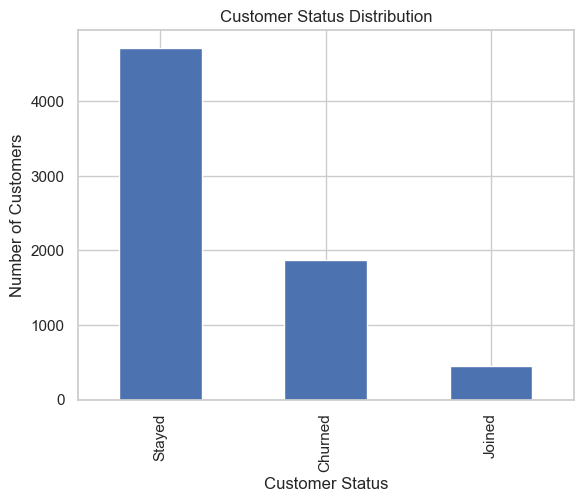

In [64]:
df["Customer Status"].value_counts().plot(
    kind="bar",
    title="Customer Status Distribution",
    ylabel="Number of Customers",
    xlabel="Customer Status"
)
plt.show()


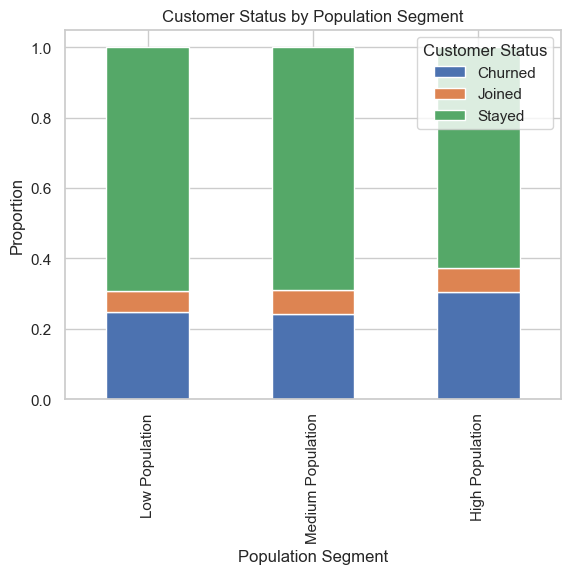

In [83]:
pd.crosstab(
    df["Population Segment"],
    df["Customer Status"],
    normalize="index"
).plot(kind="bar", stacked=True)

plt.title("Customer Status by Population Segment")
plt.ylabel("Proportion")
plt.show()


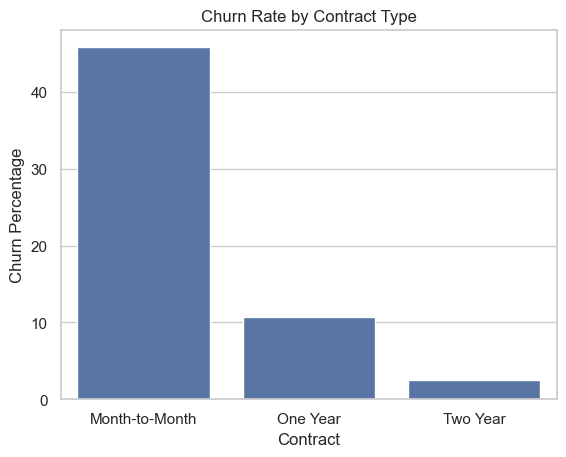

In [65]:
contract_churn = (
    df.groupby("Contract")["Customer Status"]
      .value_counts(normalize=True)
      .rename("Percentage")
      .mul(100)
      .reset_index()
)

sns.barplot(
    data=contract_churn[contract_churn["Customer Status"] == "Churned"],
    x="Contract",
    y="Percentage"
)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Percentage")
plt.show()


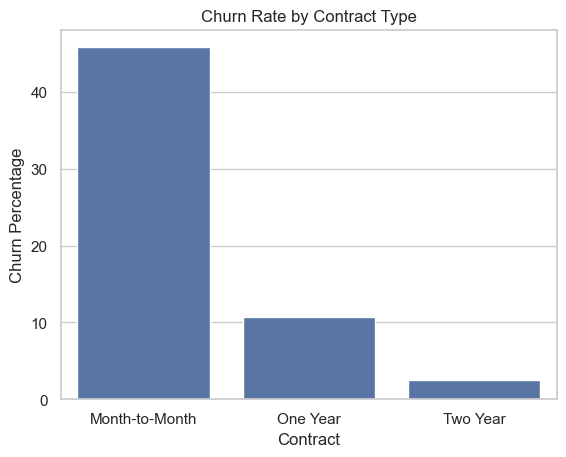

In [66]:
contract_churn = (
    df.groupby("Contract")["Customer Status"]
      .value_counts(normalize=True)
      .rename("Percentage")
      .mul(100)
      .reset_index()
)

sns.barplot(
    data=contract_churn[contract_churn["Customer Status"] == "Churned"],
    x="Contract",
    y="Percentage"
)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Percentage")
plt.show()


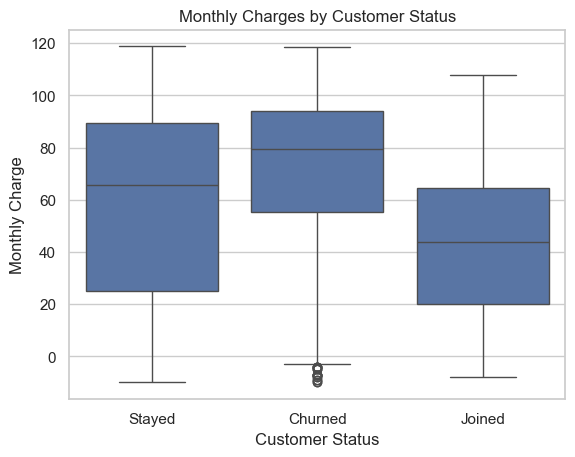

In [67]:
sns.boxplot(
    data=df,
    x="Customer Status",
    y="Monthly Charge"
)
plt.title("Monthly Charges by Customer Status")
plt.show()


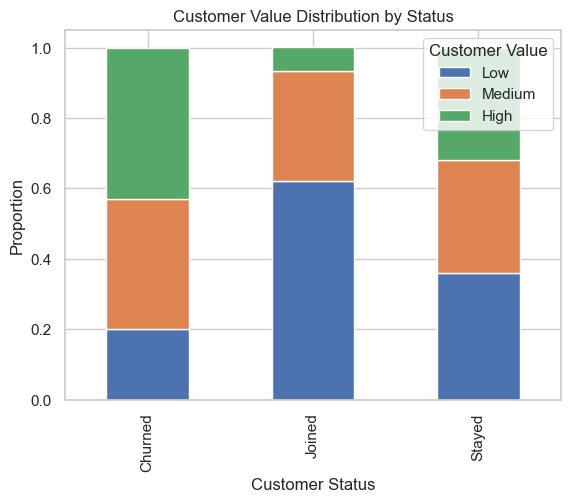

In [68]:
pd.crosstab(
    df["Customer Status"],
    df["Customer Value"],
    normalize="index"
).plot(kind="bar", stacked=True)

plt.title("Customer Value Distribution by Status")
plt.ylabel("Proportion")
plt.show()


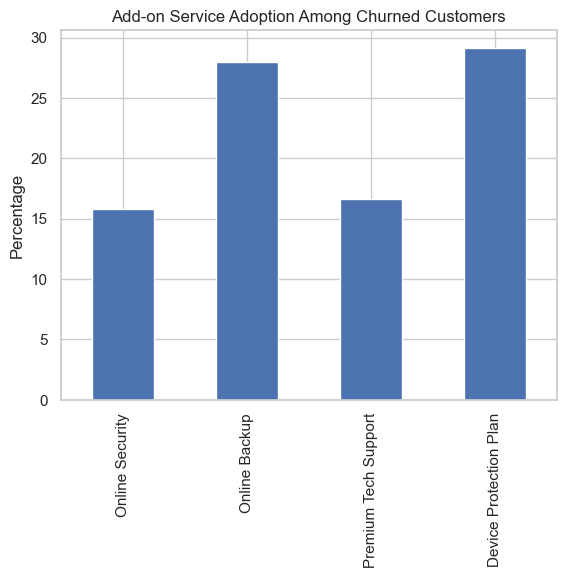

In [71]:
addon_cols = [
    "Online Security", "Online Backup",
    "Premium Tech Support", "Device Protection Plan"
]

churned = df[df["Customer Status"] == "Churned"]

addon_usage = churned[addon_cols].apply(
    lambda x: (~x.str.contains("No", case=False)).mean() * 100
)

addon_usage.plot(kind="bar")
plt.title("Add-on Service Adoption Among Churned Customers")
plt.ylabel("Percentage")
plt.show()


In [17]:
df.to_csv('modified_data.csv', index=False)

NameError: name 'df' is not defined